In [2]:
class MatchRow:
    def __init__(self, row, all_num=False):
        if all_num:
            self.data = [float(row[i]) for i in range(len(row) - 1)]
        else:
            self.data = row[0:len(row) - 1]
        self.match = int(row[len(row) - 1])

In [5]:
def load_match(file, all_num=False):
    rows = []
    with open(file) as f:
        for line in f:
            rows.append(MatchRow(line.split(','), all_num))
    return rows

In [6]:
ages_only = load_match('agesonly.csv', all_num=True)
matchmaker = load_match('matchmaker.csv')

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_age_matches(rows):
    xdm, ydm = [r.data[0] for r in rows if r.match == 1], [r.data[1] for r in rows if r.match == 1]
    xdn, ydn = [r.data[0] for r in rows if r.match == 0], [r.data[1] for r in rows if r.match == 0]
    
    plt.plot(xdm, ydm, 'go', label='match')
    plt.plot(xdn, ydn, 'ro', label='no match')
    plt.legend(loc='upper right')
    plt.xlabel("man's age")
    plt.ylabel("woman's age")
    plt.title('scatter plot of man\'s versus the woman\'s age')

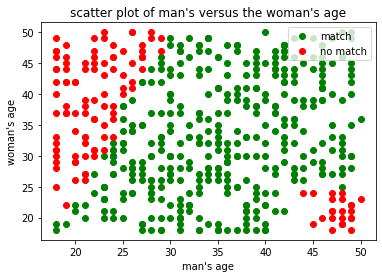

In [25]:
plot_age_matches(ages_only)

## Basic linear classification

In [32]:
def linear_train(rows):
    averages = {}
    counts = {}
    for row in rows:
        # Get the class of this point.
        cl = row.match
        
        averages.setdefault(cl, [0.0] * (len(row.data)))
        counts.setdefault(cl, 0)
        
        # Add this point to the averages.
        for i in range(len(row.data)):
            averages[cl][i] += float(row.data[i])
        
        # Keep track of how many points in each class.
        counts[cl] += 1
    
    # Divide sums by counts to get the averages.
    for cl, avg in averages.items():
        for i in range(len(avg)):
            avg[i] /= counts[cl]
    return averages

In [38]:
avgs = linear_train(ages_only)

In [39]:
def dotproduct(v1, v2):
    return sum([v1[i] * v2[i] for i in range(len(v1))])

In [40]:
def dotproduct_classify(point, avgs):
    b = (dotproduct(avgs[1], avgs[1]) - dotproduct(avgs[0], avgs[0])) / 2
    y = dotproduct(point, avgs[0]) - dotproduct(point, avgs[1]) + b
    if y > 0: return 0
    return 1

In [41]:
dotproduct_classify([30, 30], avgs)

1

In [42]:
## Categorical features

In [43]:
def yesno(v):
    if v == 'yes': return 1
    if v == 'no': return -1
    return 0

In [44]:
def match_count(interest1, interest2):
    l1 = interest1.split(':')
    l2 = interest2.split(':')
    x = 0
    for v in l1:
        if v in l2: x += 1
    return x

In [ ]:
def miles_distance(a1, a2):
    return 0